In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Non_Textual_and_Textual_Features.csv")

# Function to create labels based on the Boolean columns BUG and BIC of the dataset. Necessary for our dataset, might be optional for others.
def label_bool(is_bug,bic):
    if(is_bug==1 and bic==1):
        return 1 # Intrinsic
    elif(is_bug==1 and bic==0):
        return 0 # Extrinsic
    else:
        return 0 # Non-bug
    
df["Label"]=df.apply(lambda x: label_bool(x['BUG'],x['BIC']),axis=1)

df.columns

Index(['Unnamed: 0.2', 'commit_id', 'author_date', 'bugcount', 'fixcount',
       'la', 'ld', 'nf', 'nd', 'ns', 'ent', 'revd', 'nrev', 'rtime', 'tcmt',
       'hcmt', 'self', 'ndev', 'age', 'nuc', 'app', 'aexp', 'rexp', 'oexp',
       'arexp', 'rrexp', 'orexp', 'asexp', 'rsexp', 'osexp', 'asawr', 'rsawr',
       'osawr', 'Unnamed: 0.1', 'Unnamed: 0', 'BugId', 'Project', 'FixHashId',
       'BUG', 'BIC', 'Comments', 'title', 'description', 'BFC_message',
       'Label'],
      dtype='object')

In [17]:
df[['bugcount', 'fixcount','la', 'ld', 'nf', 'nd', 'ns', 'ent', 'revd', 'nrev', 'rtime', 'tcmt','hcmt', 'self', 'ndev', 'age', 'nuc', 'app', 'aexp', 'rexp', 'oexp','arexp', 'rrexp', 'orexp', 'asexp', 'rsexp', 'osexp', 'asawr', 'rsawr','osawr']].describe()



,bugcount,fixcount,la,ld,nf,nd,ns,ent,nrev,rtime,...,oexp,arexp,rrexp,orexp,asexp,rsexp,osexp,asawr,rsawr,osawr
count,396.000000,1838.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1267.000000,1.267000e+03,...,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000
mean,0.964646,1.046246,48.538830,33.425000,3.329787,2.489362,1.021809,0.594356,5.091555,2.546319e+06,...,1721.054183,220.038247,1368.713147,1461.253386,164.550598,1163.760956,1228.125896,0.084751,0.491170,0.514006
std,1.005686,0.271159,154.880508,290.326239,4.924417,2.519724,0.160006,0.377591,5.632742,3.645955e+06,...,1125.477103,365.670582,855.931766,901.202537,321.164928,931.650191,984.347473,0.150413,0.254339,0.255437
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-1.833272e+07,...,7.000000,0.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000125,0.001561,0.005096
25%,0.000000,1.000000,5.000000,2.000000,2.000000,1.000000,1.000000,0.171610,2.000000,3.004270e+05,...,880.000000,10.000000,732.000000,792.000000,5.000000,464.000000,478.000000,0.003470,0.291395,0.314823
50%,1.000000,1.000000,19.000000,5.000000,2.000000,2.000000,1.000000,0.746591,3.000000,1.108945e+06,...,1374.000000,48.000000,1133.000000,1209.000000,34.000000,821.000000,854.000000,0.018613,0.444708,0.469626
75%,1.000000,1.000000,47.000000,14.000000,3.000000,2.000000,1.000000,0.913030,6.000000,3.208766e+06,...,2367.000000,250.500000,1856.000000,2033.500000,174.500000,1809.500000,1903.500000,0.100466,0.758496,0.779423
max,9.000000,4.000000,4845.000000,8081.000000,78.000000,38.000000,3.000000,1.000000,52.000000,2.415580e+07,...,6036.000000,2280.000000,4399.000000,4580.000000,2255.000000,4145.000000,5014.000000,0.808219,0.984925,0.988186


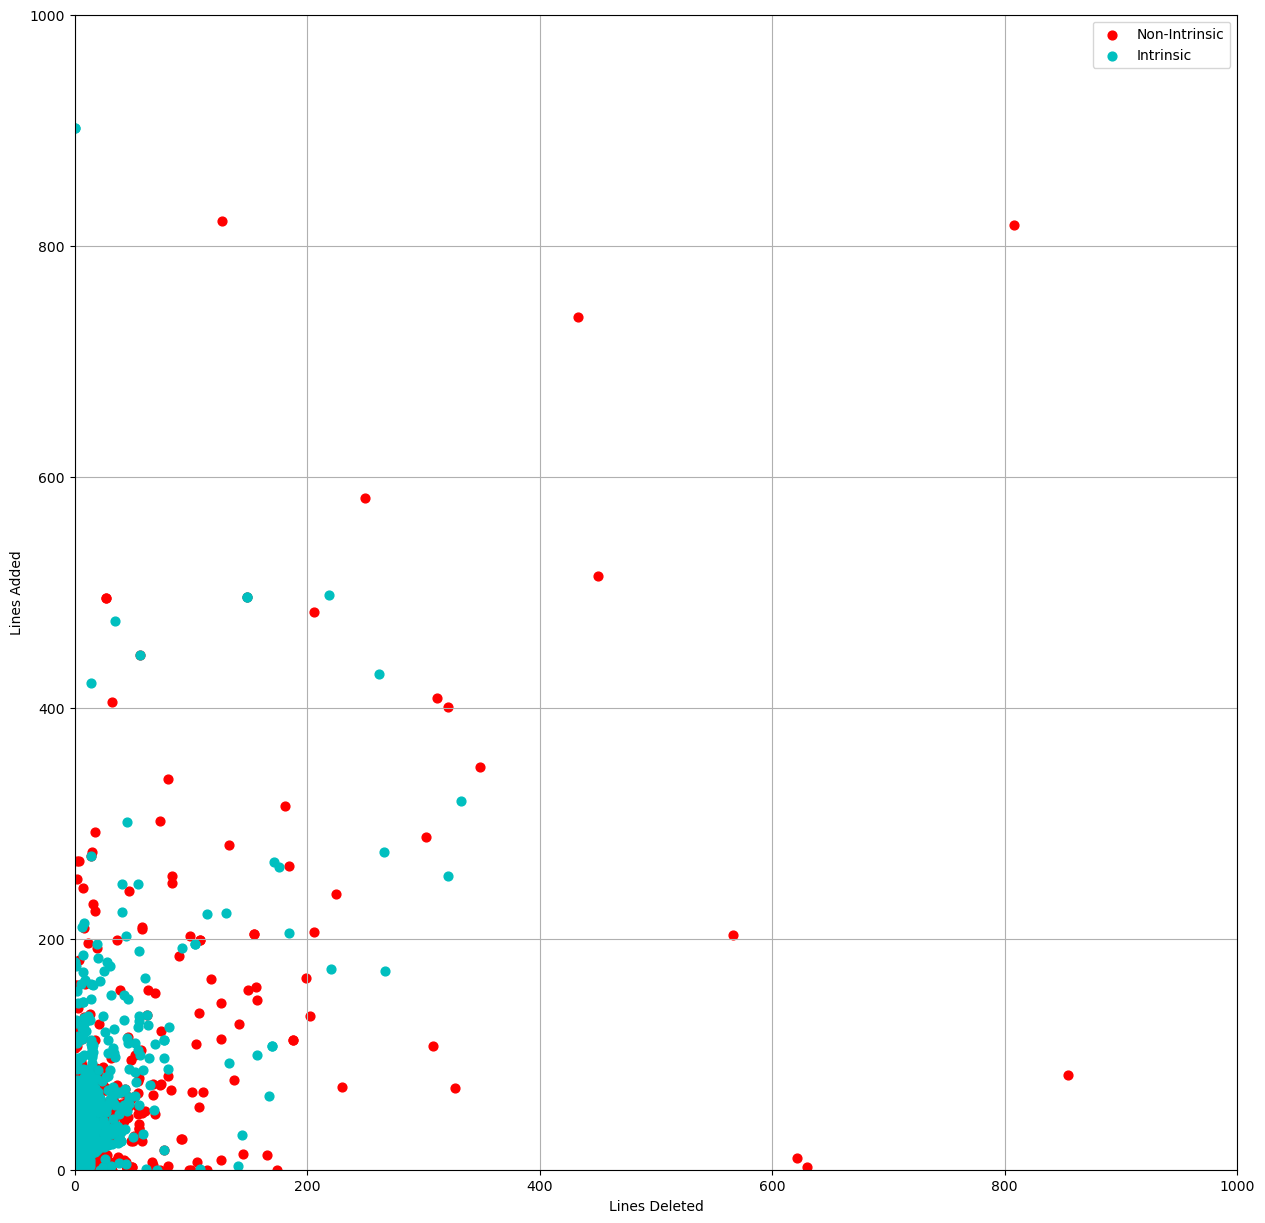

In [13]:
def scatter_plot_custom(x1,x2,y,feature1,feature2):
    plt.figure(figsize=(15, 15))
    plt.scatter(x1[y==0],x2[y==0],c='r',s=40) # Non-intrinsic
    plt.scatter(x1[y==1],x2[y==1],c='c',s=40) # Intrinsic
    plt.grid(1)
    plt.legend(["Non-Intrinsic","Intrinsic"])
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.xlim(0, 1000)
    plt.ylim(0, 1000)
    
x1=df["ld"]
x2=df["la"]
y=df["Label"]
scatter_plot_custom(x1,x2,y,"Lines Deleted", "Lines Added")

Comparison between size and diffusion type feature groups



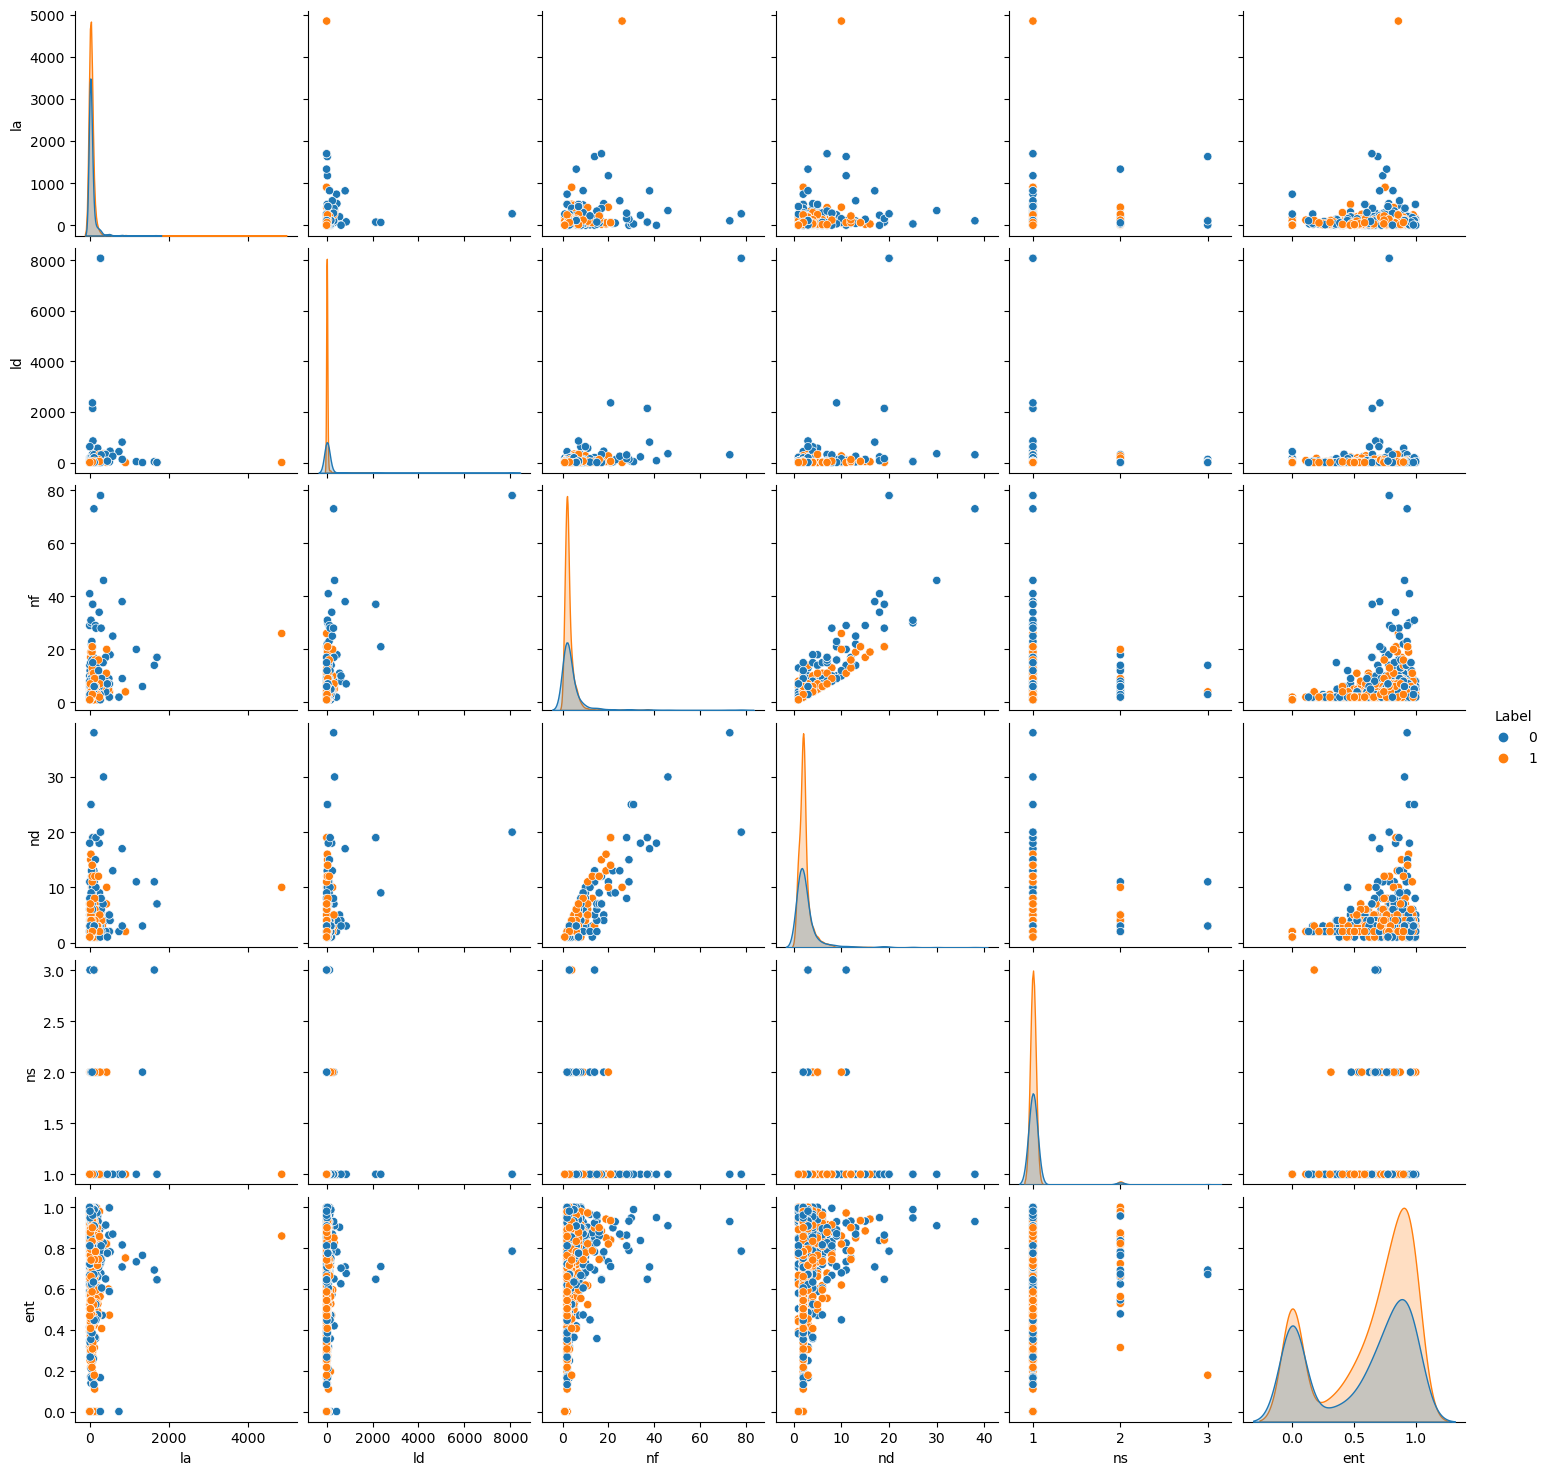

In [7]:
import seaborn as sns

size = ['la','ld']
diffusion = ['nf','nd','ns','ent']
history = ['nuc','ndev','age']
experience = ['aexp', 'arexp', 'asexp', 'asawr']
review = ['nrev','app','hcmt','rtime']

print("Comparison between size and diffusion type feature groups\n")
sns.pairplot(df, hue = 'Label', vars = size+diffusion)



Comparison between size and history type feature groups



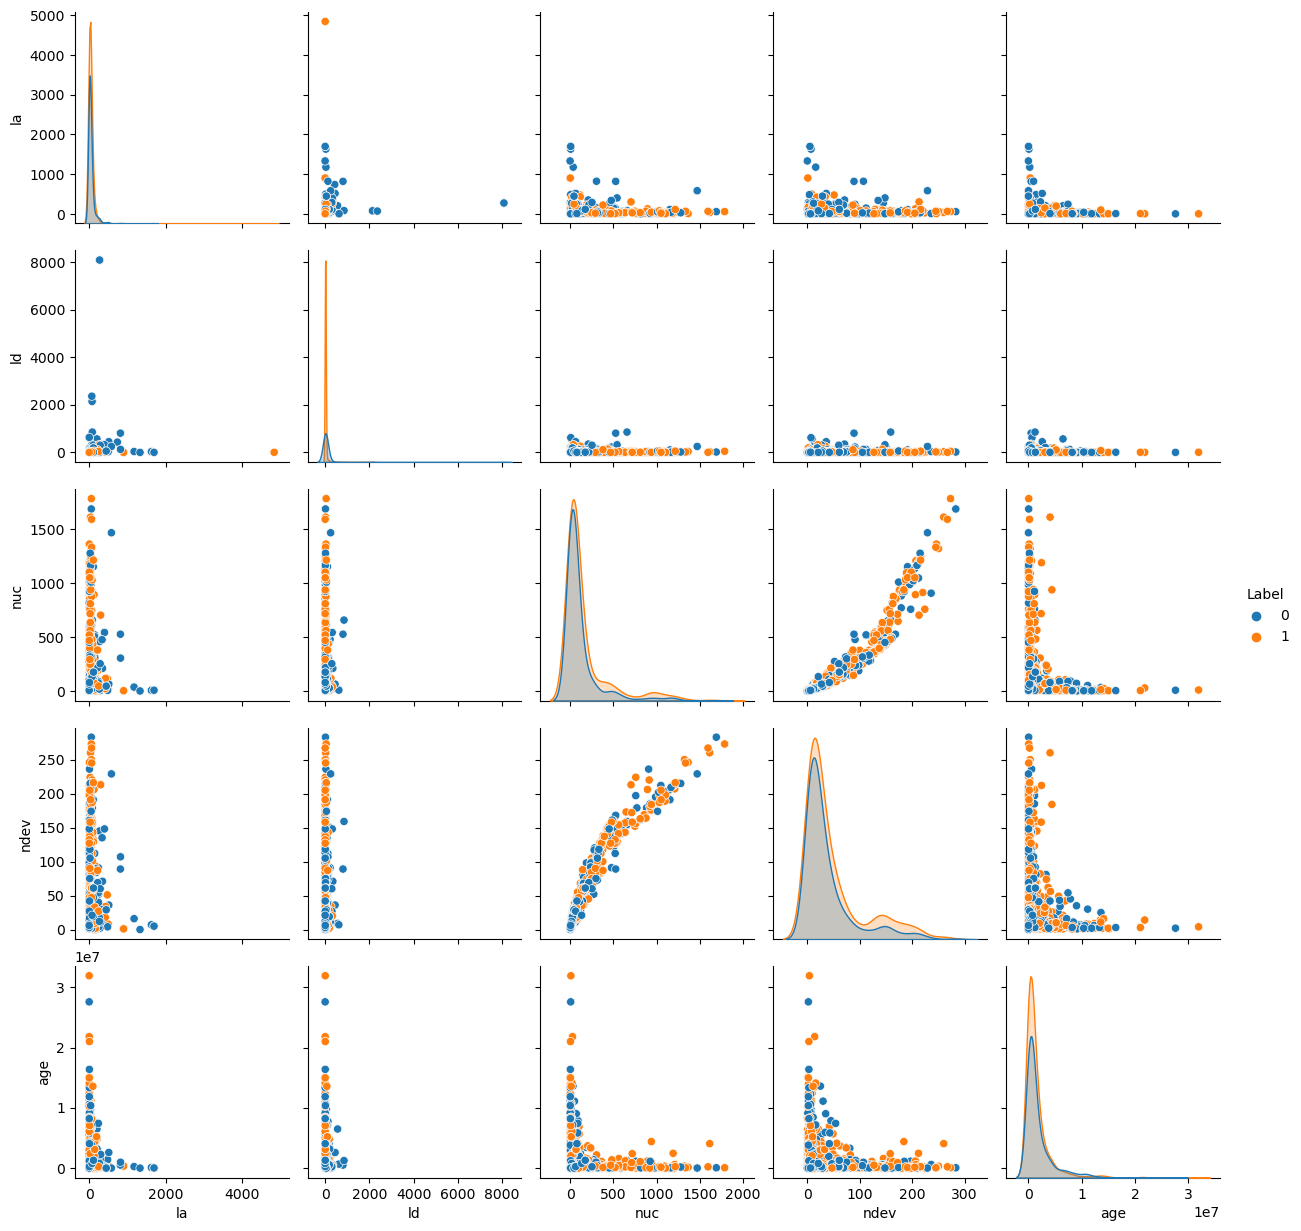

In [8]:
print("Comparison between size and history type feature groups\n")
sns.pairplot(df, hue = 'Label', vars = size+history)

Comparison between size and experience type feature groups



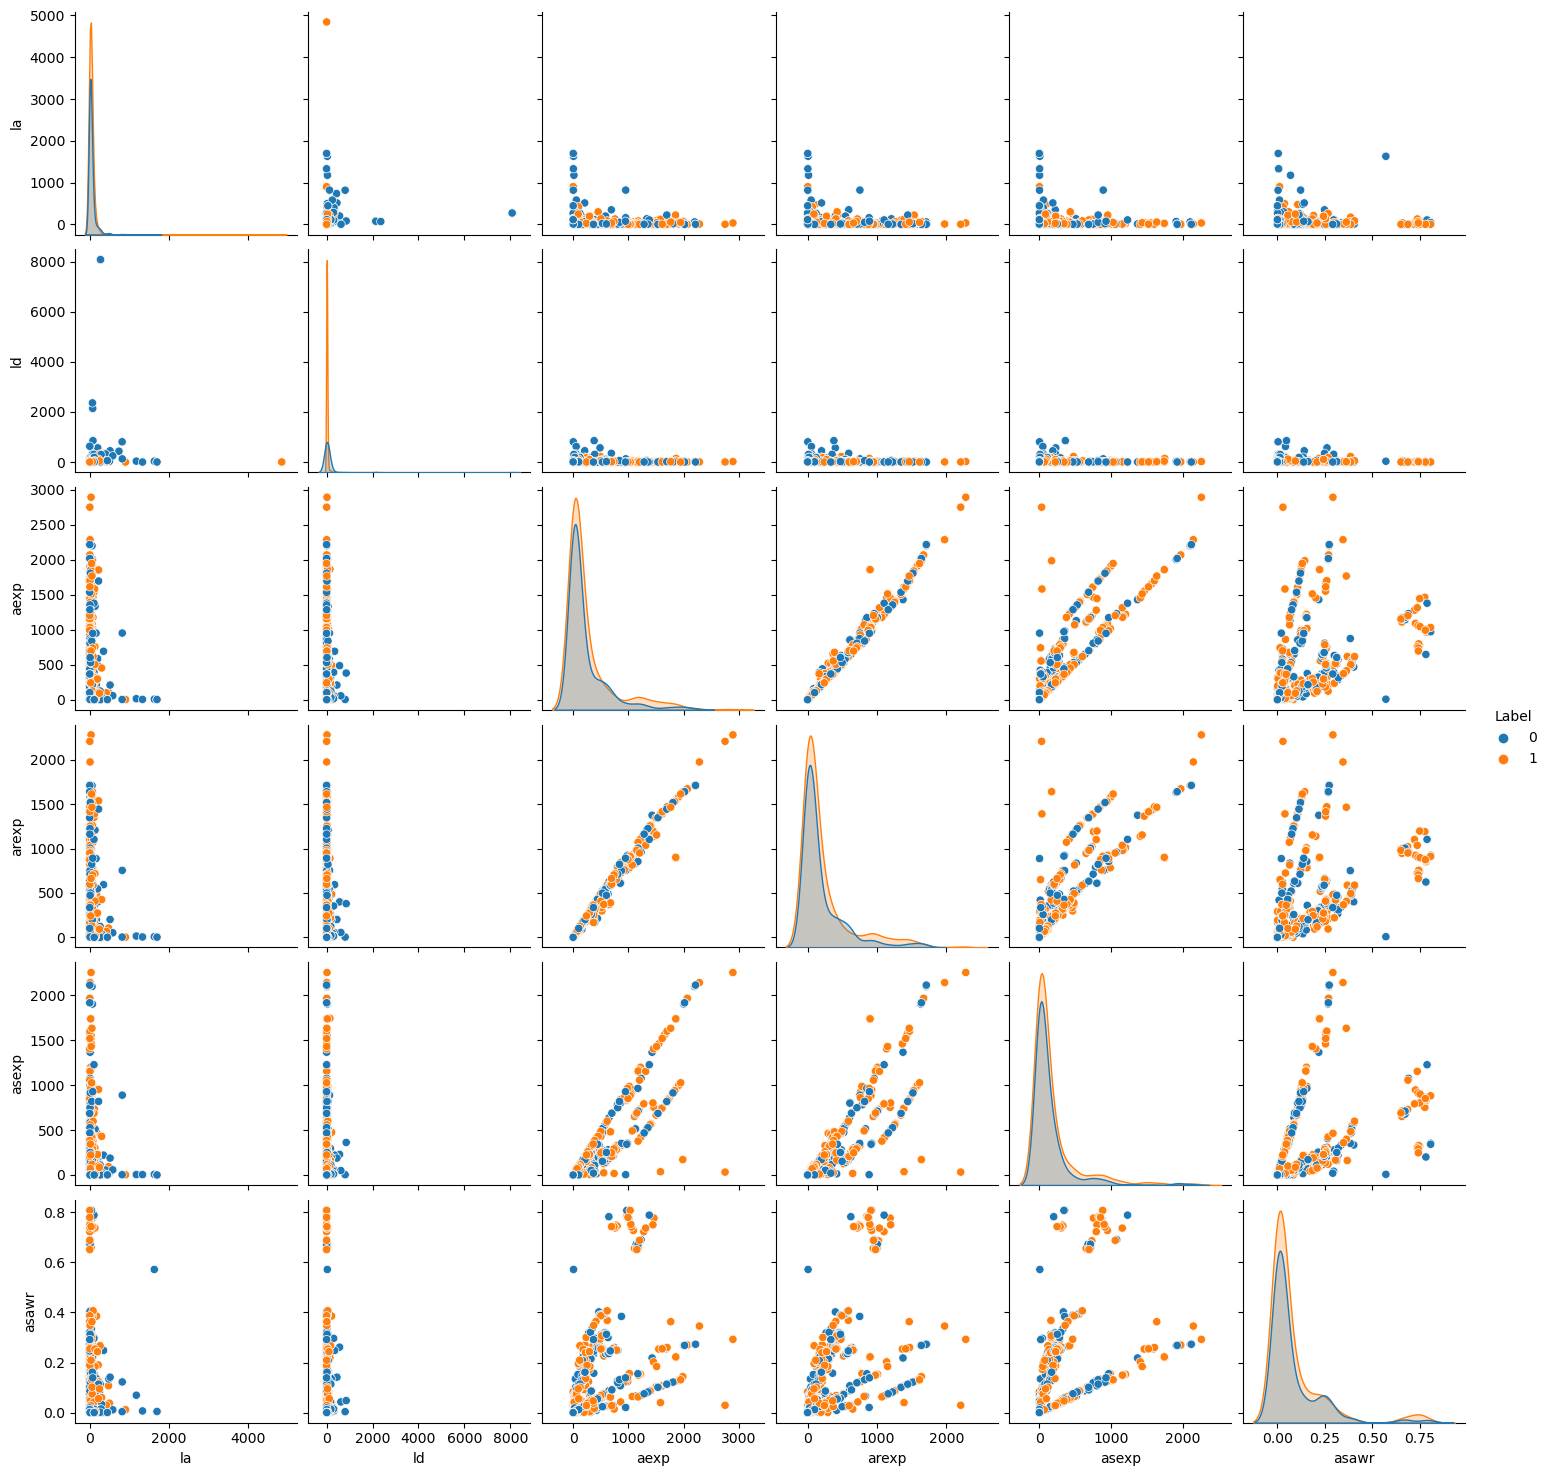

In [9]:
print("Comparison between size and experience type feature groups\n")
sns.pairplot(df, hue = 'Label', vars = size+experience)

Comparison between size and review type feature groups



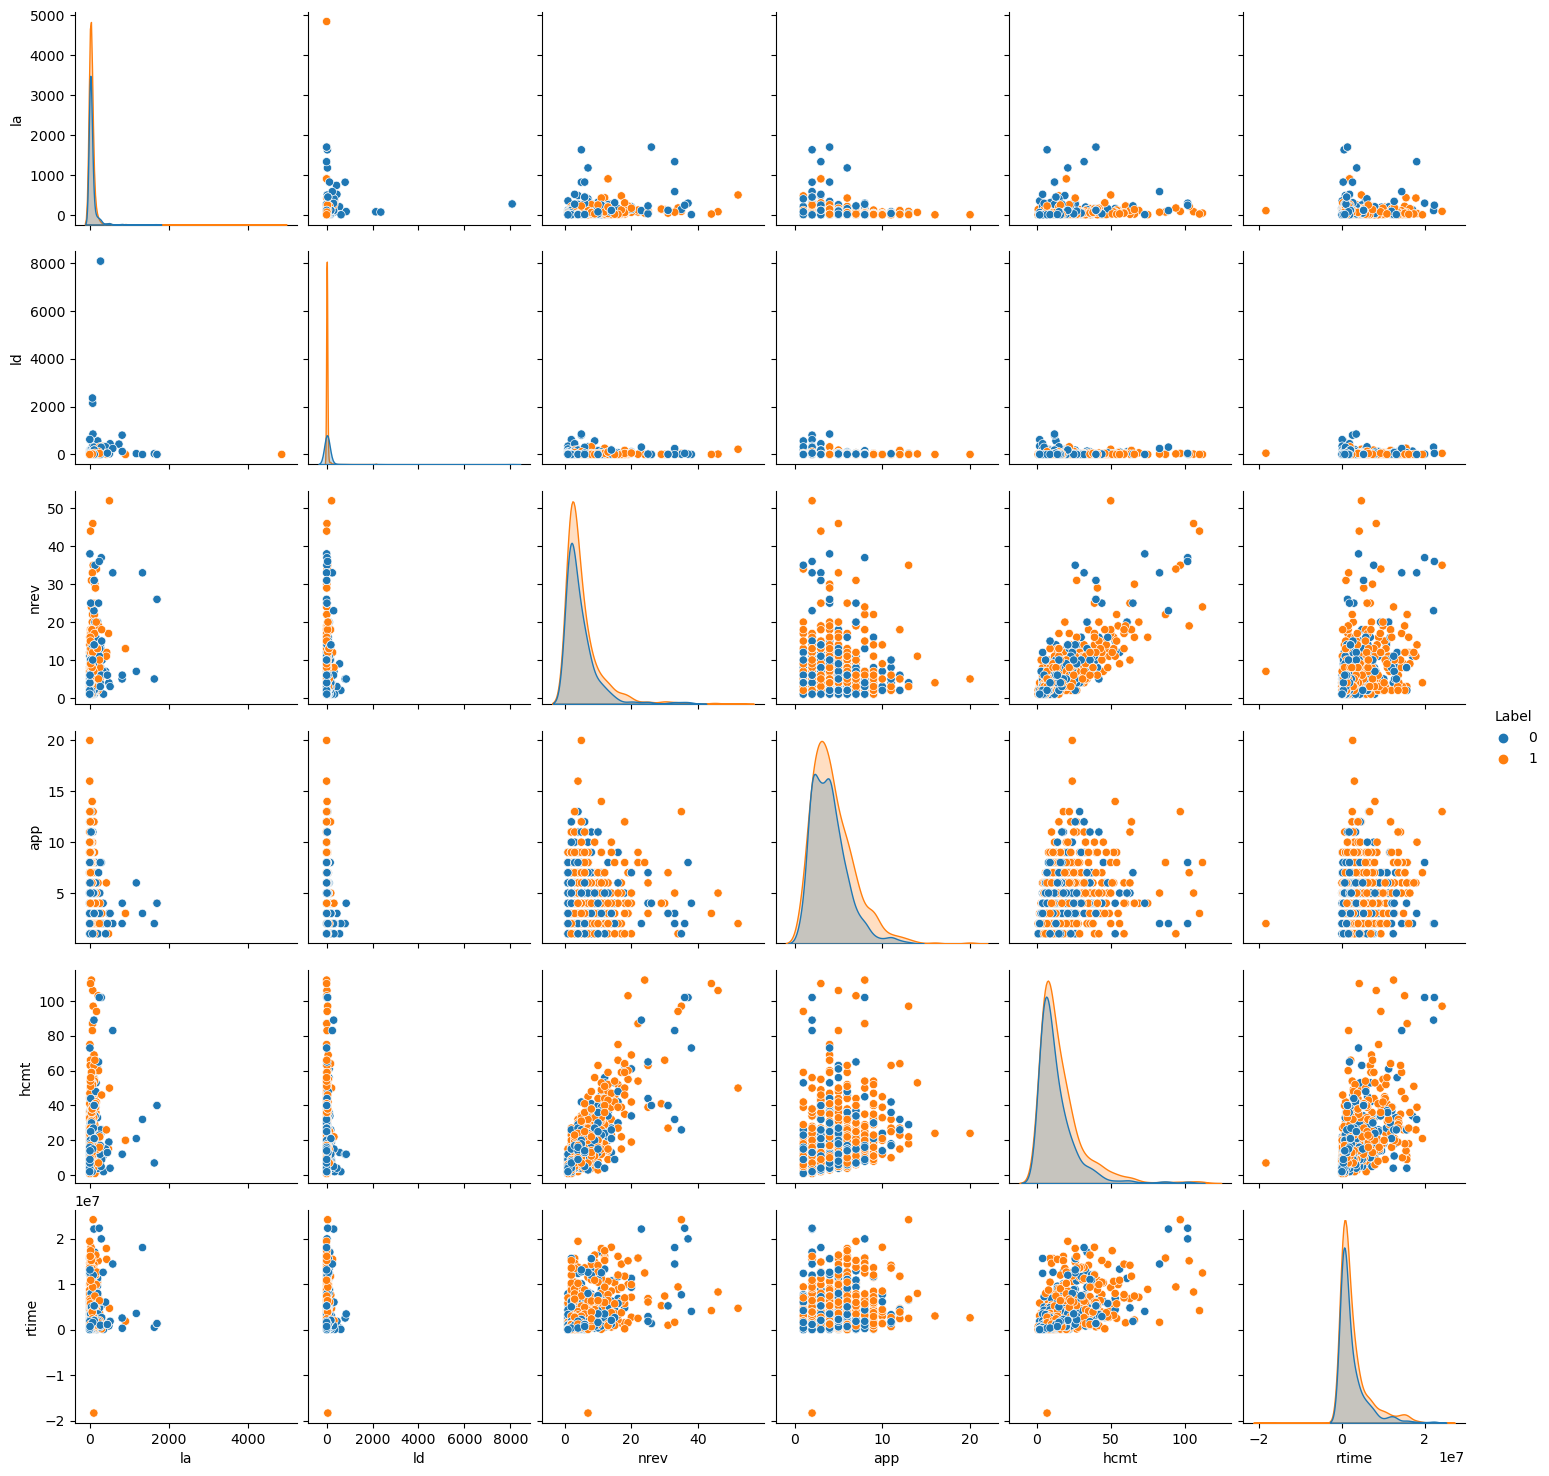

In [10]:
print("Comparison between size and review type feature groups\n")
sns.pairplot(df, hue = 'Label', vars = size+review)

Comparison between diffusion and review type feature groups



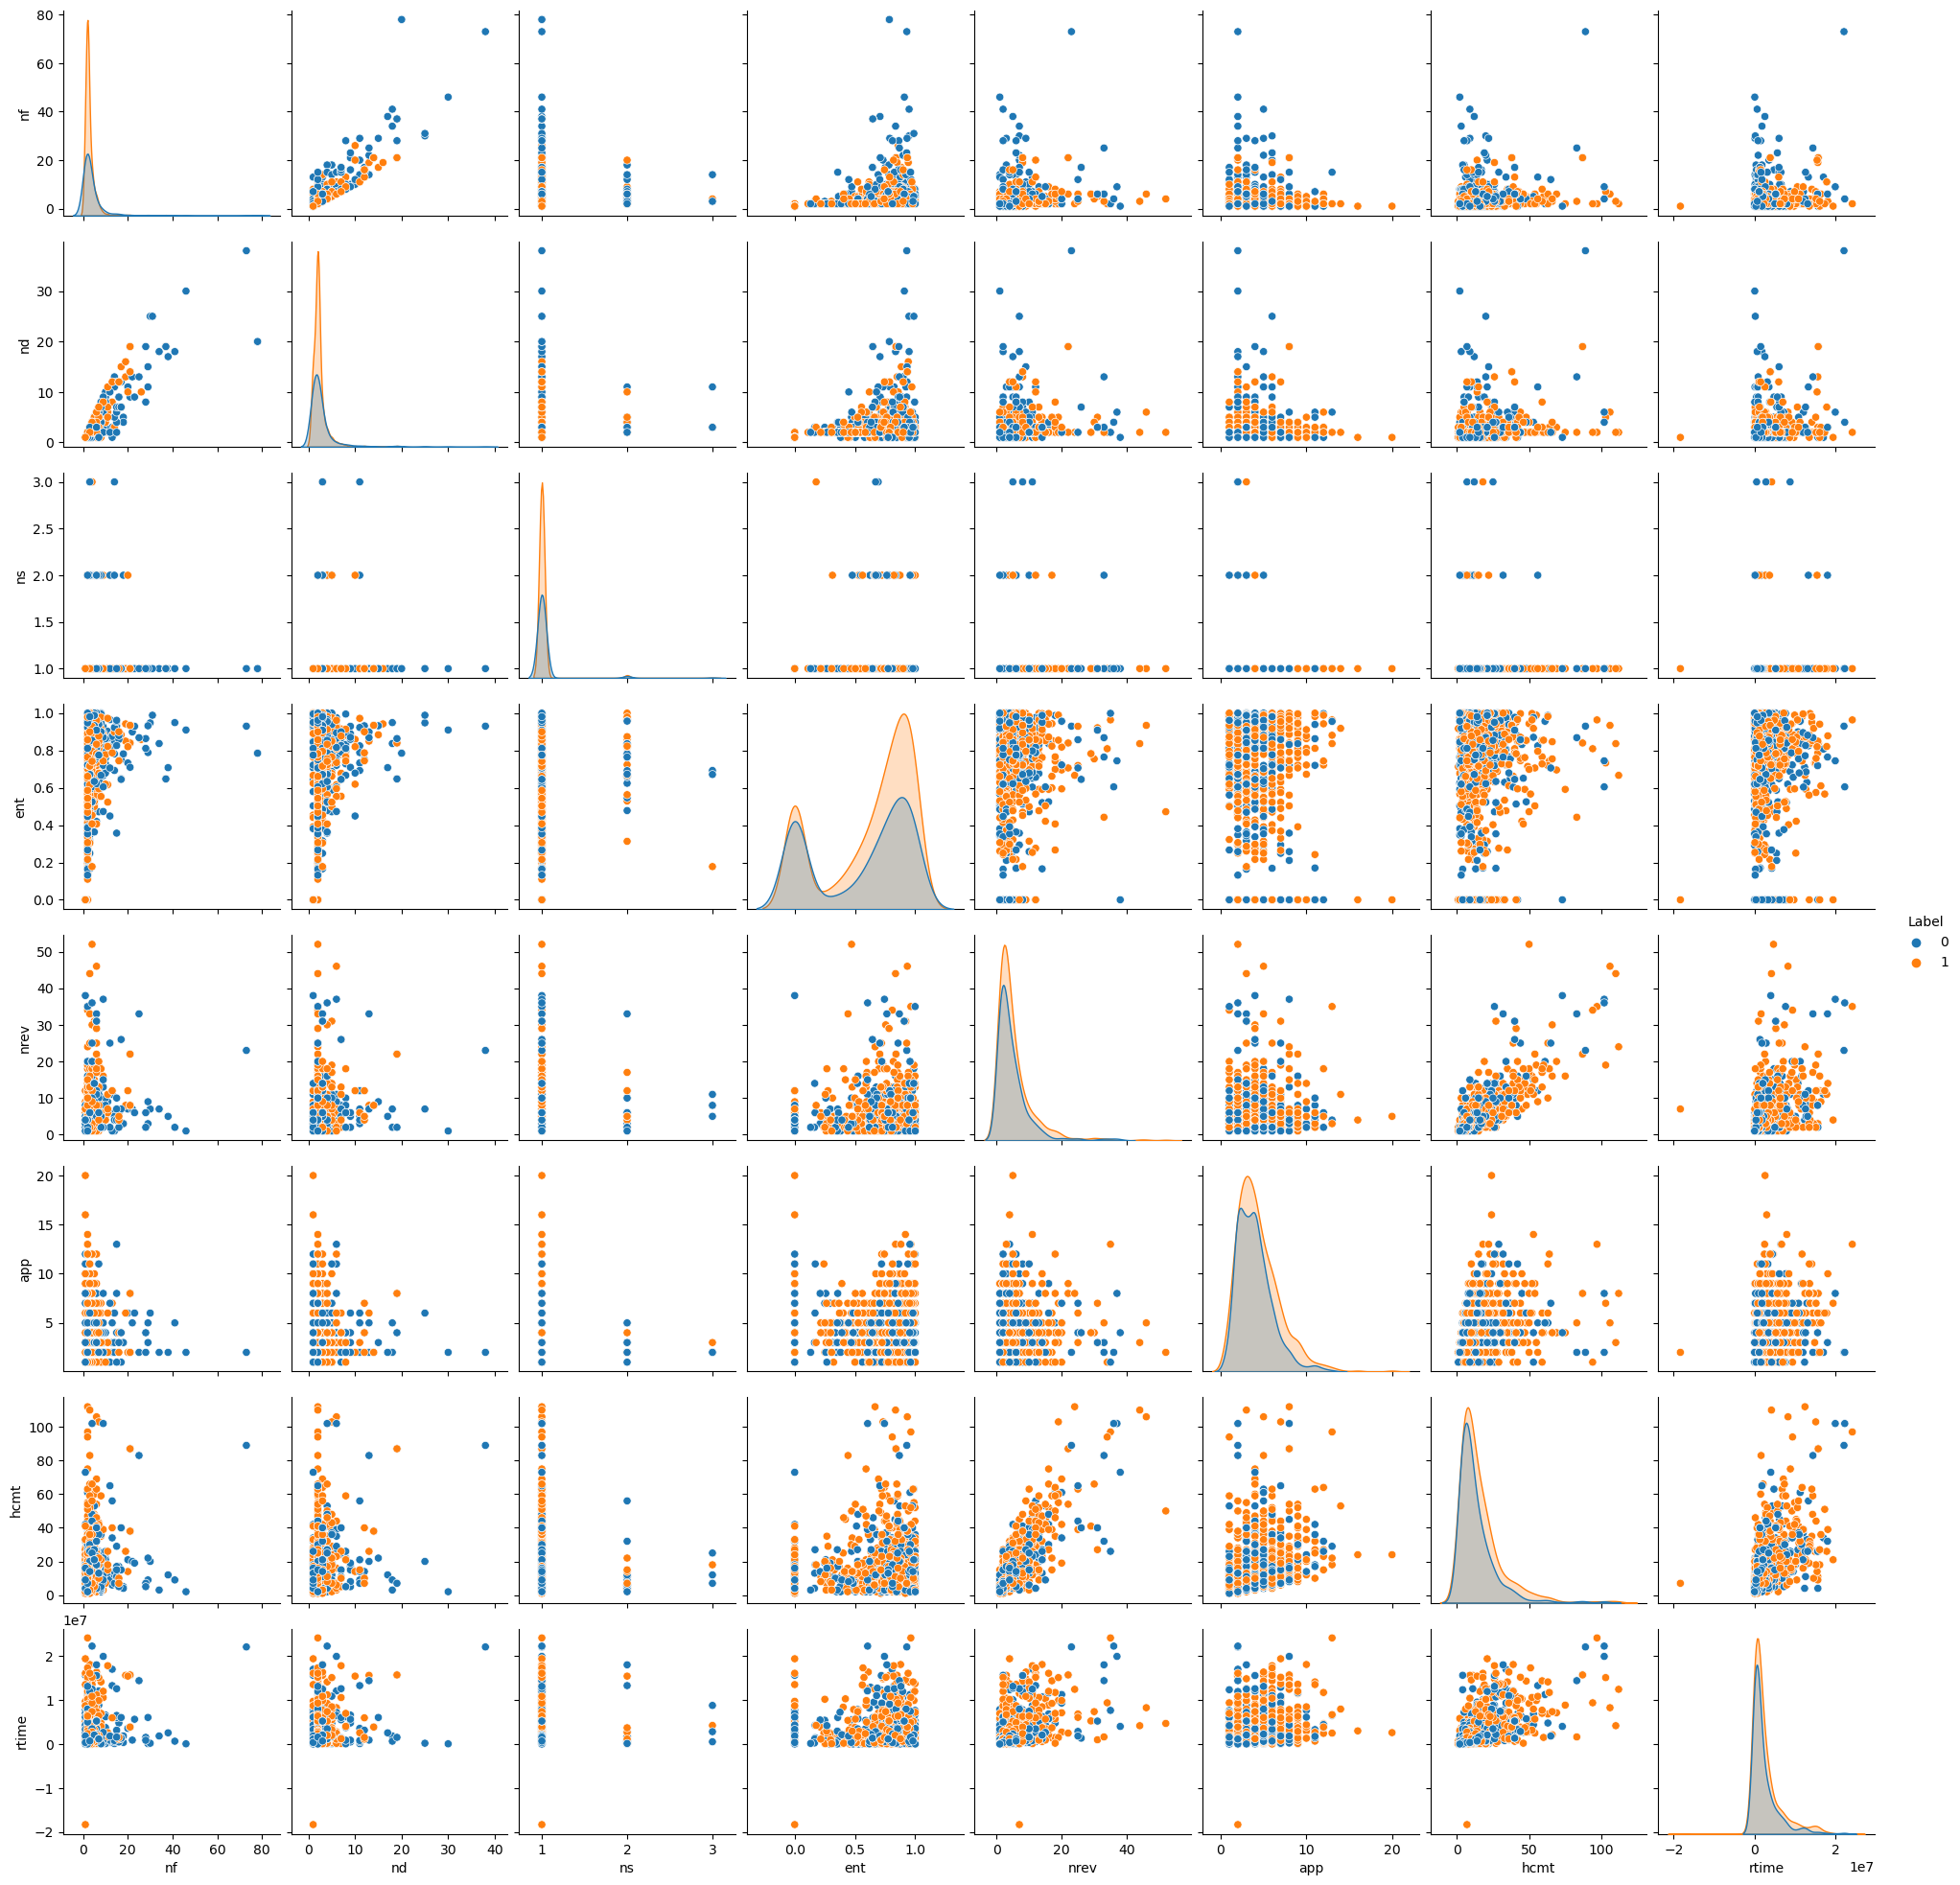

In [11]:
print("Comparison between diffusion and review type feature groups\n")
sns.pairplot(df, hue = 'Label', vars = diffusion+review)